# Test Validation Metrics

During evaluation when training the model, images are put into `metrics/PRED_DIR/` and `metrics/TARG_DIR/`, so this file is used to visually test the results written to those locations.

In [3]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import cv2
import skimage.io as io
import matplotlib.pyplot as plt
import glob
import os
import random

In [161]:
TYPE = "post" # pre (localization) or post (disaster)
PATH = "./outputs/output_localization_29/PRED_DIR/*{}*".format(TYPE)

In [162]:
def get_image_with_class_value(image, value):
    return np.where(image == value, 1, 0).astype("uint8") * 255

image_name: midwest-flooding_00000182_post_disaster_tl.png
Pred, original, targ


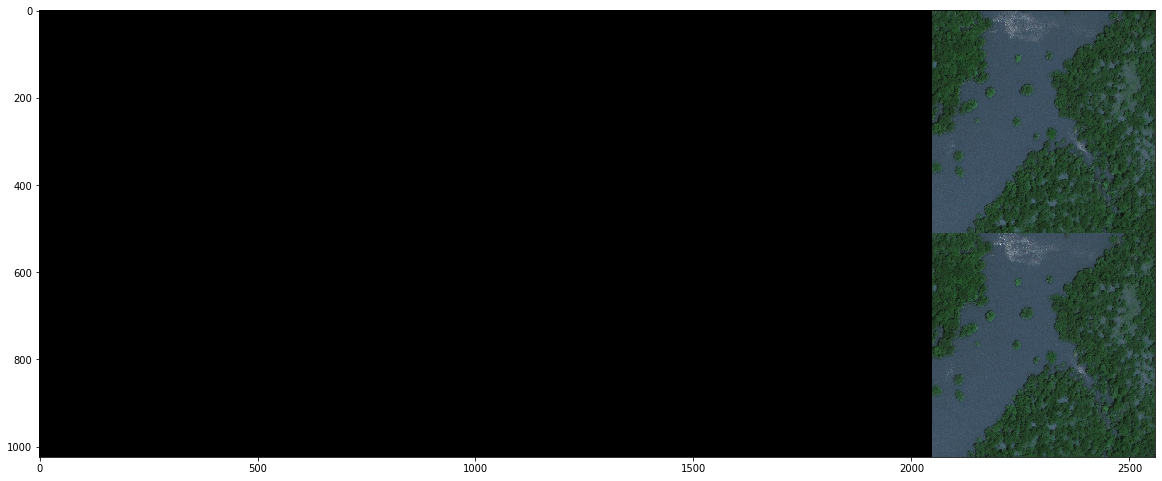

image_name: pinery-bushfire_00000160_post_disaster_bl.png
Pred, original, targ


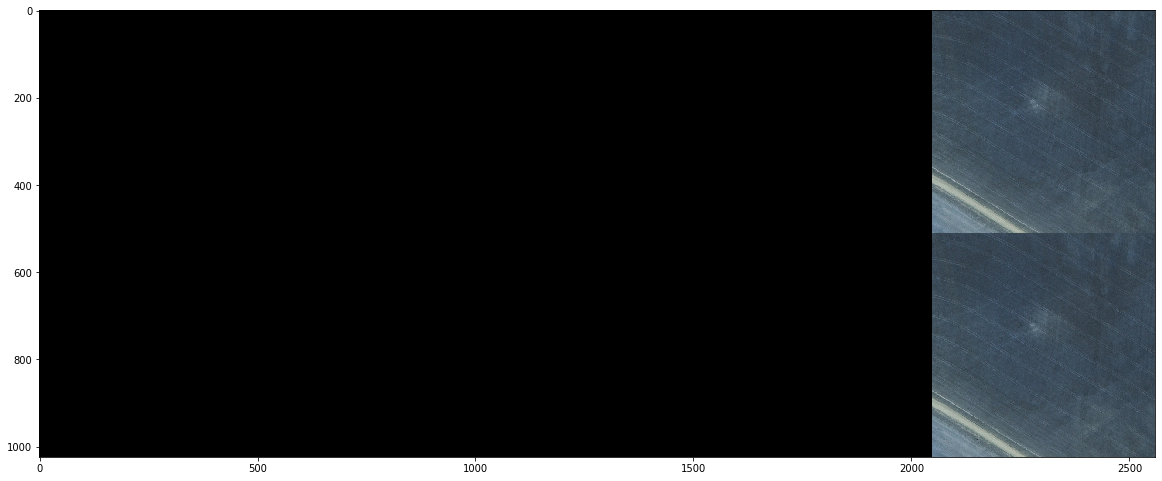

image_name: woolsey-fire_00000855_post_disaster_tr.png
Pred, original, targ


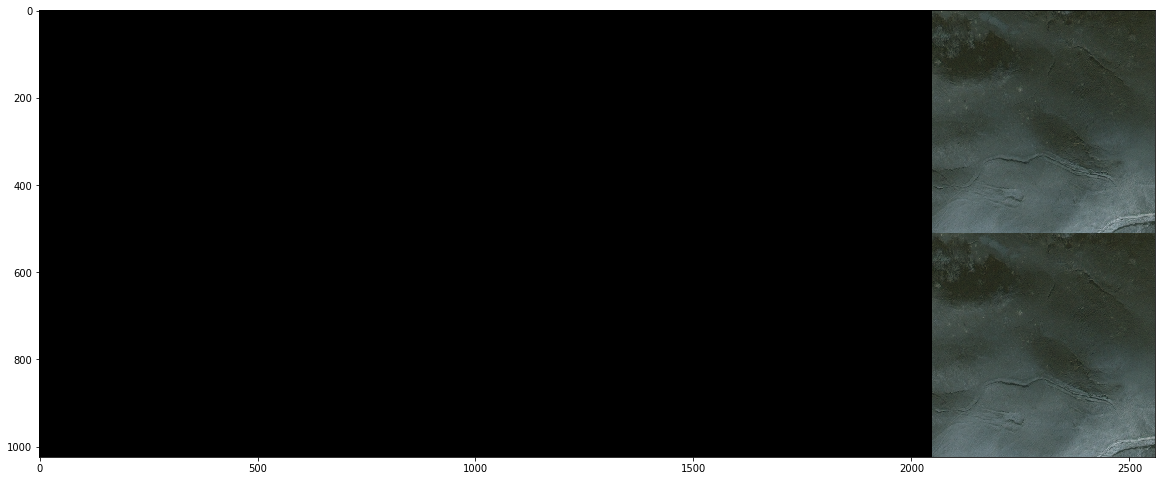

image_name: joplin-tornado_00000068_post_disaster_br.png
Pred, original, targ


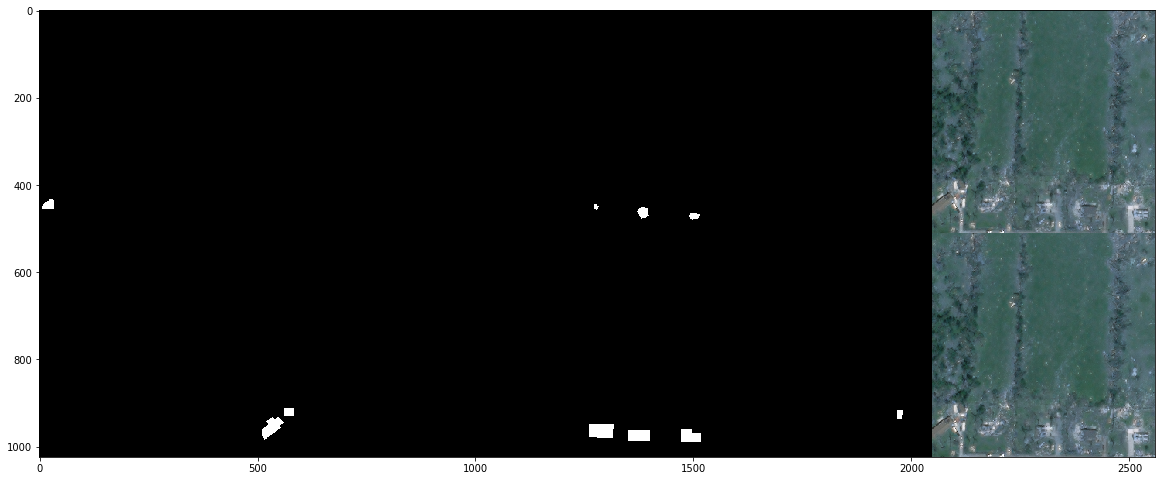

image_name: hurricane-michael_00000308_post_disaster_tr.png
Pred, original, targ


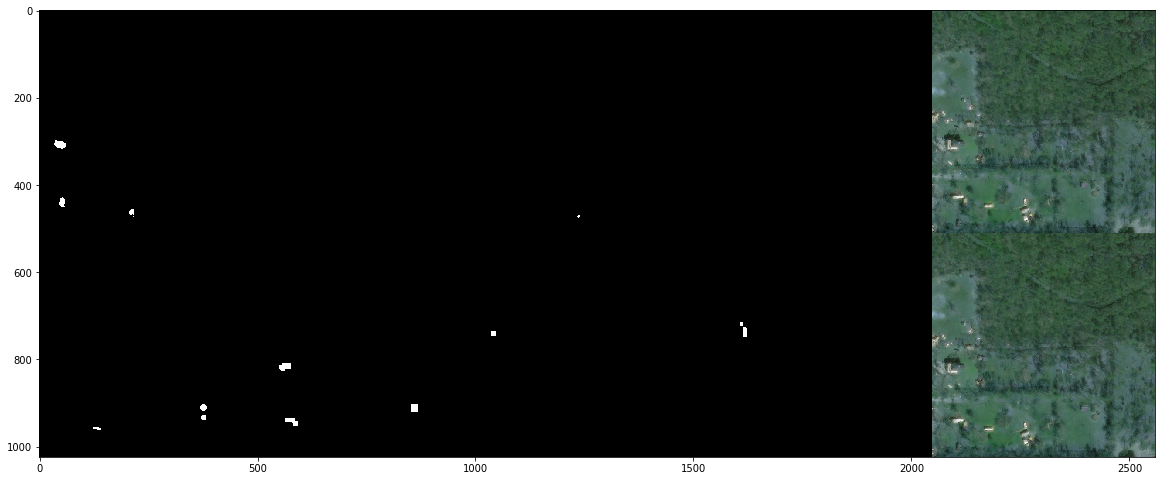

In [168]:
for i in range(5):
    image_names = [os.path.basename(path) for path in glob.glob(PATH)]
    image_name = image_names[random.randint(0, len(image_names) - 1)]
    print("image_name: {}".format(image_name))

    pred_image = cv2.imread("./outputs/output_localization_29/PRED_DIR/{}".format(image_name))
    targ_image = cv2.imread("./outputs/output_localization_29/TARG_DIR/{}".format(image_name))
    orig_image = cv2.imread("./data/train_images_quad/{}".format(image_name))

    if TYPE == "pre":
        image = np.hstack([pred_image * 255, orig_image, targ_image * 255])
        plt.figure(figsize=(20, 10))
        plt.imshow(image)
        print("Pred, original, targ")
    elif TYPE == "post":
        top_image = np.hstack([
            get_image_with_class_value(pred_image, 1),
            get_image_with_class_value(pred_image, 2),
            get_image_with_class_value(pred_image, 3),
            get_image_with_class_value(pred_image, 4),
            orig_image])
        bottom_image = np.hstack([
            get_image_with_class_value(targ_image, 1),
            get_image_with_class_value(targ_image, 2),
            get_image_with_class_value(targ_image, 3),
            get_image_with_class_value(targ_image, 4),
            orig_image])
        image = np.vstack([top_image, bottom_image])
        plt.figure(figsize=(20, 10))
        plt.imshow(image)
        print("Pred, original, targ")
    plt.show()


In [169]:
# filenames = glob.glob("./data/aligned_pre_post_dark/*.png")
# for filename in filenames[:100]:
#     i = cv2.imread(filename)
#     print("aligned_pr, post")
#     im = np.hstack([i[:,:,0], i[:,:,1]])
#     plt.imshow(im)
#     plt.show()